<a href="https://colab.research.google.com/github/amkayhani/Statistics/blob/main/Normality_Check_and_ANOVA_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Statistics Lab

This lab covers some of the important statistical tests and concepts using Python. We'll explore Normality Check using Chi-Square (χ²), One-Way ANOVA, F-test, and 2-Sample Test.

## 1. Random Normal Number Generation and Vizulisation

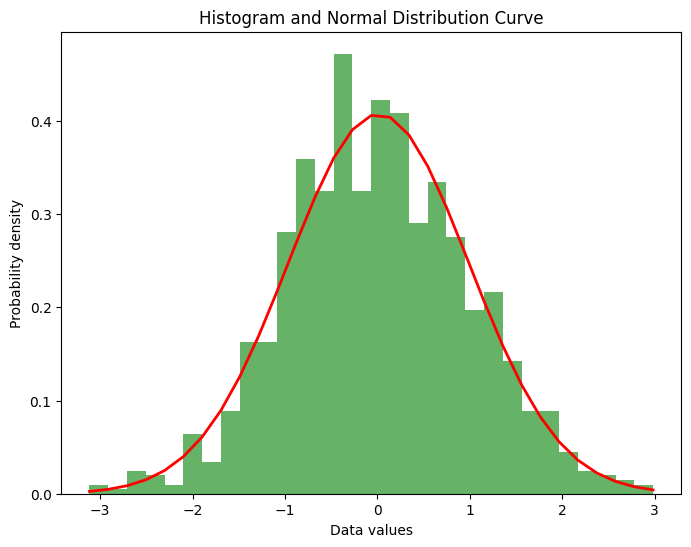

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Generate a normal distribution sample
data = np.random.normal(0, 1, 1000)

# Visualize the distribution with histogram and a normal distribution curve
plt.figure(figsize=(8, 6))
count, bins, ignored = plt.hist(data, 30, density=True, alpha=0.6, color='g')

# Plot the distribution curve
mu, std = stats.norm.fit(data)  # Get the mean and standard deviation for the fitted normal distribution
p = stats.norm.pdf(bins, mu, std) # calculates the value of the probability of density function of a normal distribution for each value in x
plt.plot(bins, p, linewidth=2, color='r')
plt.title('Histogram and Normal Distribution Curve')
plt.xlabel('Data values')
plt.ylabel('Probability density')

# Show the plot with non-scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## 2. One-Way ANOVA

One-Way Analysis of Variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.

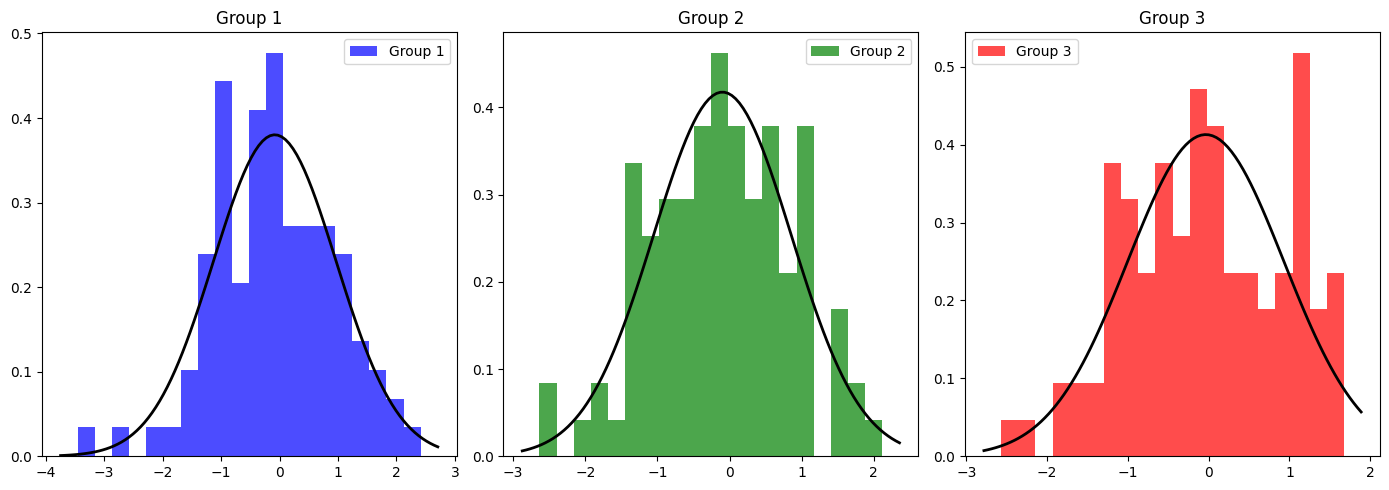

0.9014767651105113
No group mean is significantly different


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generating sample data
group1 = np.random.normal(0, 1, 100)
group2 = np.random.normal(0, 1, 100)
group3 = np.random.normal(0, 1, 100)

# Visualizing the generated numbers with histograms and fitting a normal distribution curve

# Plot histograms for each group
plt.figure(figsize=(14, 5))

# Group 1
plt.subplot(1, 3, 1)
plt.hist(group1, bins=20, color='blue', alpha=0.7, label='Group 1', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(group1), np.std(group1))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group 1')
plt.legend()

# Group 2
plt.subplot(1, 3, 2)
plt.hist(group2, bins=20, color='green', alpha=0.7, label='Group 2', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(group2), np.std(group2))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group 2')
plt.legend()

# Group 3
plt.subplot(1, 3, 3)
plt.hist(group3, bins=20, color='red', alpha=0.7, label='Group 3', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(group3), np.std(group3))
plt.plot(x, p, 'k', linewidth=2)
plt.title('Group 3')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Performing the One-Way ANOVA
anova_result = stats.f_oneway(group1, group2, group3)

print(anova_result.pvalue)

# Interpreting the result
if anova_result.pvalue < 0.05:
    print("At least one group mean is different")
else:
    print("No group mean is significantly different")


## 3. F-test

The F-test is used to compare two population variances. It assumes that the populations are normally distributed.

In [ ]:
# Calculating variances
variance1 = np.var(group1, ddof=1)
variance2 = np.var(group2, ddof=1)

# Calculating the F-test statistic
f_value = variance1/variance2
print(f_value)
# Interpreting the result
if f_value > 1:
    print("Variance of group1 is greater than group2")
else:
    print("Variance of group2 is greater than group1")

df1 = len(group1) - 1
df2 = len(group2) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

1.2062249690237346
Variance of group1 is greater than group2
Degree of freedom 1: 99
Degree of freedom 2: 99
F-statistic: 1.2062249690237346
p-value: 0.8237492355459652


## 4. 2-Sample t-Test

The 2-Sample t-test, is used to compare the means of two independent groups.

In [ ]:
# Performing the 2-Sample t-test
t_test_result = stats.ttest_ind(group1, group2)
print(t_test_result.pvalue)
# Interpreting the result
if t_test_result.pvalue < 0.05:
    print("Means are significantly different")
else:
    print("Means are not significantly different")

0.9009617451327483
Means are not significantly different



# Case Study Examples:

# **X^2 - test**

**Problem:** As part of their policy of fairness and equality, the government has agreed that the salaries offered in public sector should be following the normal distribution with a specified mean of 45.000€ and a standard deviation of 7.500€. Recently, there have been some complaints and the minister of economics is worried that the standard deviation has changed. The following sample data has been collected for testing purposes.

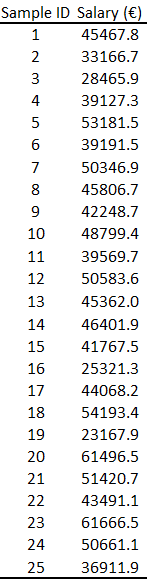

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


# Sample salary data
salary_data = np.array([
    45467.8, 33166.7, 28465.9, 39127.3, 53181.5, 39191.5, 50346.9, 45806.7,
    42248.7, 48799.4, 39569.7, 50583.6, 45362.0, 46401.9, 41767.5, 25321.3,
    44068.2, 54193.4, 23167.9, 61496.5, 51420.7, 43491.1, 61666.5, 50661.1, 36911.9
])

salary_df = pd.DataFrame(salary_data, columns=['Salary'])

# Using describe() to get most of the descriptive statistics
desc_stats = salary_df.describe()
print(desc_stats)



# Parameters for the normal distribution as specified by the government
specified_mean = 45000  # Specified mean salary
specified_std = 7500     # Specified standard deviation

# Perform a chi-square test for standard deviation
# Calculate the chi-square statistic for the sample variance against the specified variance
sample_variance = np.var(salary_data, ddof=1)
chi_square_stat = (len(salary_data) - 1) * sample_variance / (specified_std ** 2)

# Degrees of freedom for the test is n - 1
df = len(salary_data) - 1

# Calculate the p-value for the chi-square statistic
p_value = 2*(1 - stats.chi2.cdf(chi_square_stat, df))

# Output the chi-square statistic and the p-value
chi_square_stat, p_value

             Salary
count     25.000000
mean   44075.428000
std     9772.461386
min    23167.900000
25%    39191.500000
50%    45362.000000
75%    50583.600000
max    61666.500000


(40.74709399342933, 0.03550579617921179)

**Decision:** The standard deviation seems to have changed.

The p-value is less than the α = 5% which means that we have significant evidence to reject the null hypothesis. The standard deviation has changed and thus the complaints seem to be valid.

# **Normality test using X^2**

**Problem:** A manufacturing company produces iron stick for construction purposes. A key quality characteristic of the products is their length, with the customers requesting that the products are 19.5 ± 4.5 metres. Recently, there have been many complaints regarding the quality of the product and thus you have decided to collect a sample and investigate the process.

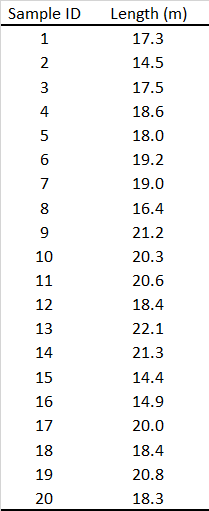

Ho: The data derives from a normal distribution.

H1: The data does not derive from a normal distribution.

          Length
count  20.000000
mean   18.560000
std     2.258178
min    14.400000
25%    17.450000
50%    18.500000
75%    20.375000
max    22.100000
Box Plot Values:
Q1: 17.45, Q3: 20.375, IQR: 2.9250000000000007
Lower Bound for Outliers: 13.062499999999998
Upper Bound for Outliers: 24.762500000000003

Rounded Number of classes: 5
class Range: 1.5400000000000003


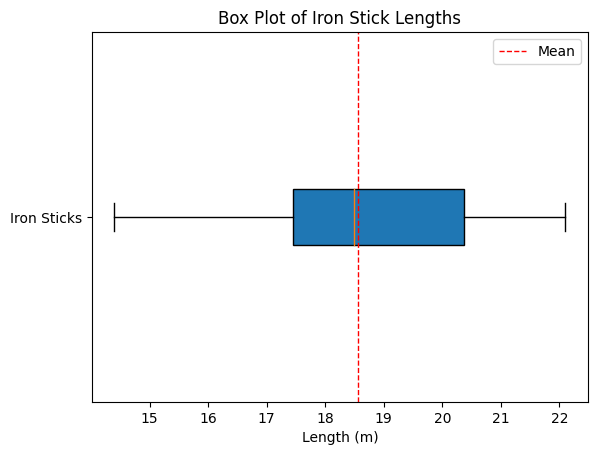

Classes:
   Length  Frequency
0   15.94          3
1   17.48          2
2   19.02          7
3   20.56          3
4   22.10          5 



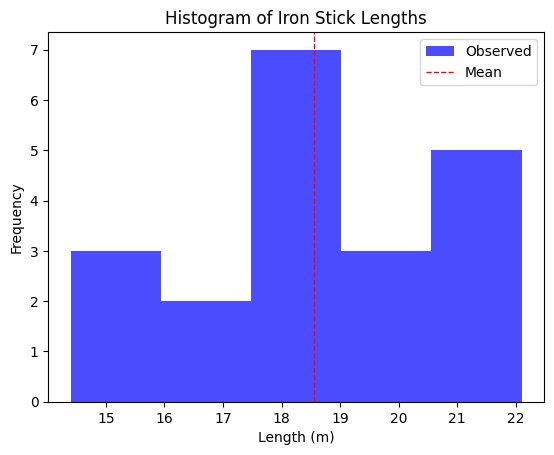

Chi-Square Table:
          χ^2
0    0.118750
1    0.899985
2    0.553126
3    0.572622
4    2.247169
Sum  4.391653
Number of classes (bins) using Sturges' formula: 5
Chi-square Statistic: 4.391652809578725, p-value: 0.1309152816662111


<ipython-input-25-64160230005e>:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.122978,0.122978,2.459563
1,0.316232,0.193254,3.865077
2,0.580708,0.264476,5.289512
3,0.812102,0.231395,4.627893
4,0.941517,0.129415,2.588293
5,Sum =,0.941517,20.000000


In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd


length_data = np.array([
    17.3, 14.5, 17.5, 18.6, 18.0, 19.2, 19.0, 16.4, 21.2, 20.3,
    20.6, 18.4, 22.1, 21.3, 14.4, 14.9, 20.0, 18.4, 20.8, 18.3
])
length_df = pd.DataFrame(length_data, columns=['Length'])

# Using describe() to get most of the descriptive statistics
desc_stats = length_df.describe()
print(desc_stats)

# Calculating the boundaries for outliers
Q1 = length_df['Length'].quantile(0.25)
Q3 = length_df['Length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
# Displaying the results
print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard dviation
mean = np.mean(length_data)
std_dev = np.std(length_data, ddof=1)

# Calculate Sturges' number of bins
n = len(length_data)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(length_data)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(length_data, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, mean, std_dev)


# Box plot
plt.boxplot(length_data, vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.yticks([1], ['Iron Sticks'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Length': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df.Length=hist_df.Length+classrange
print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(length_data, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df)

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df


**Decision:** The data derives from a normal distribution.

The p-value is greater than the common alpha level of 0.05 (5%), which means that we do not have significant evidence to reject the null hypothesis.

# **One-way ANOVA**

**Problem:** A car manufacturing company is planning to launch a new car in the market. They have developed three different types and they are interested in seeing whether there is any difference in their fuel consumption.

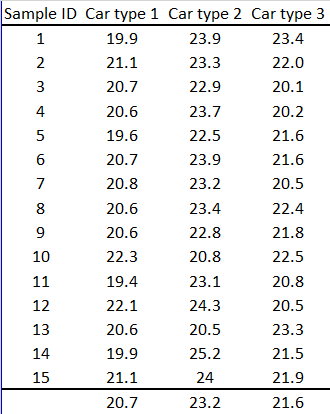

H0: μ1= μ2 = μ3

H1: 𝐴𝑡 𝑙𝑒𝑎𝑠𝑡 𝑜𝑛𝑒 𝑜𝑓 𝑡ℎ𝑒 𝑚𝑒𝑎𝑛𝑠 𝑖𝑠 𝑛𝑜𝑡 𝑒𝑞𝑢𝑎𝑙

In [ ]:
import pandas as pd

# Car fuel consumption data
car_type_1 = np.array([19.9, 21.1, 20.7, 20.6, 19.6, 20.7, 20.8, 20.6, 20.6, 22.3, 19.4, 22.1, 20.6, 19.9, 21.1])
car_type_2 = np.array([23.9, 23.3, 22.9, 23.7, 22.5, 23.9, 23.2, 23.4, 22.8, 20.8, 23.1, 24.3, 20.5, 25.2, 24])
car_type_3 = np.array([23.4, 22.0, 20.1, 20.2, 21.6, 21.6, 20.5, 22.4, 21.8, 22.5, 20.8, 20.5, 23.3, 21.5, 21.9])

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(car_type_1, car_type_2, car_type_3)

# Calculate summary statistics for each group
summary_stats = pd.DataFrame({
    'Groups': ['Car type 1', 'Car type 2', 'Car type 3'],
    'Count': [len(car_type_1), len(car_type_2), len(car_type_3)],
    'Sum': [np.sum(car_type_1), np.sum(car_type_2), np.sum(car_type_3)],
    'Average': [np.mean(car_type_1), np.mean(car_type_2), np.mean(car_type_3)],
    'Variance': [np.var(car_type_1, ddof=1), np.var(car_type_2, ddof=1), np.var(car_type_3, ddof=1)]
})

# Calculate ANOVA table components
group_means = [np.mean(car_type_1), np.mean(car_type_2), np.mean(car_type_3)]
grand_mean = np.mean(np.concatenate([car_type_1, car_type_2, car_type_3]))

# Sum of Squares Between (SSB)
ss_between = sum([len(car_type) * (mean - grand_mean) ** 2 for car_type, mean in zip([car_type_1, car_type_2, car_type_3], group_means)])

# Sum of Squares Within (SSW)
ss_within = sum([np.sum((car_type - mean) ** 2) for car_type, mean in zip([car_type_1, car_type_2, car_type_3], group_means)])

# Total Sum of Squares (SST)
ss_total = ss_between + ss_within

# Degrees of freedom Between
df_between = len(group_means) - 1

# Degrees of freedom Within
df_within = len(np.concatenate([car_type_1, car_type_2, car_type_3])) - len(group_means)

# Mean Square Between (MSB)
ms_between = ss_between / df_between

# Mean Square Within (MSW)
ms_within = ss_within / df_within

# F critical value for a 0.05 alpha level
f_crit = stats.f.ppf(q=1-0.05, dfn=df_between, dfd=df_within)

# ANOVA table
anova_table = pd.DataFrame({
    'Source of Variation': ['Between Groups', 'Within Groups', 'Total'],
    'SS': [ss_between, ss_within, ss_total],
    'df': [df_between, df_within, df_between + df_within],
    'MS': [ms_between, ms_within, ''],
    'F': [f_stat, '', ''],
    'P-value': [p_value, '', ''],
    'F crit': [f_crit, '', '']
})

# Display results
print(summary_stats, '\n')
print(anova_table)

       Groups  Count    Sum    Average  Variance
0  Car type 1     15  310.0  20.666667  0.646667
1  Car type 2     15  347.5  23.166667  1.493810
2  Car type 3     15  324.1  21.606667  1.082095 

  Source of Variation      SS  df       MS         F P-value    F crit
0      Between Groups  47.836   2   23.918  22.26607     0.0  3.219942
1       Within Groups  45.116  42  1.07419                            
2               Total  92.952  44                                     


**Decision:** Reject the null hypothesis.

There is a significant difference between the three types of cars in regards to their fuel consumption performance.


# **F-Test**

**Problem:** After having received many complaints, the minister of economics is interested in investigating whether the variabilities of the salaries of male and female employees in the public sector are equal. The following sample data has been collected for testing purposes.

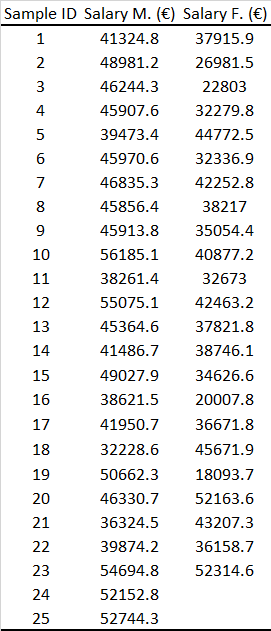



In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Given salary data
salary_m = np.array([
    41324.8, 48981.2, 46244.3, 45907.6, 39473.4, 45970.6, 46835.3, 45856.4,
    45913.8, 56185.1, 38261.4, 55075.1, 45364.6, 41486.7, 49027.9, 38621.5,
    41950.7, 32228.6, 50662.3, 46330.7, 36324.5, 39874.2, 54694.8, 52152.8, 52744.3
])
salary_f = np.array([
    37915.9, 26981.5, 22803, 32279.8, 44772.5, 32336.9, 42252.8, 38217,
    35054.4, 40877.2, 32673, 42463.2, 37821.8, 38746.1, 34626.6, 20007.8,
    36671.8, 45671.9, 18093.7, 52163.6, 43207.3, 36158.7, 52314.6
])

# Perform F-test for variances
variance_m = np.var(salary_m, ddof=1)
variance_f = np.var(salary_f, ddof=1)
F = variance_m / variance_f
df_m = len(salary_m) - 1
df_f = len(salary_f) - 1
p_value_one_tail = stats.f.cdf(F, df_m, df_f)  # This is the p-value for the one-tail test
p_value_two_tail = 2 * min(p_value_one_tail, 1 - p_value_one_tail).round(4)   # Two-tail test
f_crit_one_tail = stats.f.ppf(0.05, df_m, df_f).round(4)

# Descriptive statistics
desc_stats_m = {
    'Mean': np.mean(salary_m),
    'Standard Error': stats.sem(salary_m),
    'Median': np.median(salary_m),
    'Standard Deviation': np.std(salary_m, ddof=1),
    'Variance': variance_m,
    'Minimum': np.min(salary_m),
    'Maximum': np.max(salary_m),
    'Range': np.ptp(salary_m),
    'Sum': np.sum(salary_m),
    'Count': len(salary_m)
}

desc_stats_f = {
    'Mean': np.mean(salary_f),
    'Standard Error': stats.sem(salary_f),
    'Median': np.median(salary_f),
    'Standard Deviation': np.std(salary_f, ddof=1),
    'Variance': variance_f,
    'Minimum': np.min(salary_f),
    'Maximum': np.max(salary_f),
    'Range': np.ptp(salary_f),
    'Sum': np.sum(salary_f),
    'Count': len(salary_f)
}

# Compile descriptive statistics into a DataFrame for display
desc_stats_df = pd.DataFrame([desc_stats_m, desc_stats_f], index=['Salary M. (€)', 'Salary F. (€)']).T

# Convert the DataFrame to display float values without scientific notation
#pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Add statistical summary to the DataFrame
desc_stats_df.loc['Observations', :] = [len(salary_m), len(salary_f)]
desc_stats_df.loc['df', :] = [df_m, df_f]
desc_stats_df.loc['F', 'Salary M. (€)'] = F
desc_stats_df.loc['P(F<=f) one-tail', 'Salary M. (€)'] = p_value_one_tail.round(4)
desc_stats_df.loc['F Critical one-tail', 'Salary M. (€)'] = f_crit_one_tail.round(4)

# Display the DataFrame
print(desc_stats.round(4))

# Output containing the F Statistic, p-value, and critical value
output = {
    'F Statistic': F,
    'p-value (two-tailed)': p_value_two_tail,
    'F Critical (one-tailed, 95%)': f_crit_one_tail,
    'p-value (one-tailed)': p_value_one_tail
}

# Display the output
print(output)


        Length
count  20.0000
mean   18.5600
std     2.2582
min    14.4000
25%    17.4500
50%    18.5000
75%    20.3750
max    22.1000
{'F Statistic': 0.48375128250591193, 'p-value (two-tailed)': 0.0858, 'F Critical (one-tailed, 95%)': 0.4991, 'p-value (one-tailed)': 0.04294173191687588}


**Decision:** Fail to reject the Null hypothesis.

There is not significant evidence to suggest that the standard deviation of the two groups is different. Further investigation to the complaints should be conducted.


# **2-Sample t-Test**

**Problem:** After having received many complaints, the minister of economics is interested in investigating whether the variabilities of the salaries of male and female employees in the public sector are equal. The test of variances though has shown that the variances are equal, and therefore the minister decided to investigate potential differences in the mean.

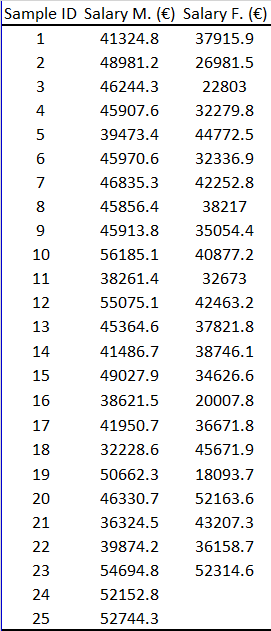


In [ ]:
# Python code to perform a two-sample t-test

# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats

# Salary data for male and female employees
salary_m = np.array([
    41324.8, 48981.2, 46244.3, 45907.6, 39473.4, 45970.6, 46835.3, 45856.4,
    45913.8, 56185.1, 38261.4, 55075.1, 45364.6, 41486.7, 49027.9, 38621.5,
    41950.7, 32228.6, 50662.3, 46330.7, 36324.5, 39874.2, 54694.8, 52152.8, 52744.3
])
salary_f = np.array([
    37915.9, 26981.5, 22803, 32279.8, 44772.5, 32336.9, 42252.8, 38217,
    35054.4, 40877.2, 32673, 42463.2, 37821.8, 38746.1, 34626.6, 20007.8,
    36671.8, 45671.9, 18093.7, 52163.6, 43207.3, 36158.7, 52314.6
])

# Descriptive statistics
desc_stats_m = {
    'Mean': np.mean(salary_m),
    'Variance': np.var(salary_m, ddof=1),
    'Observations': len(salary_m)
}

desc_stats_f = {
    'Mean': np.mean(salary_f),
    'Variance': np.var(salary_f, ddof=1),
    'Observations': len(salary_f)
}

# Perform two-sample t-test
t_stat, p_value_two_tail = stats.ttest_ind(salary_m, salary_f, equal_var=True)
df = len(salary_m) + len(salary_f) - 2
p_value_one_tail = p_value_two_tail / 2
pooled_variance = ((len(salary_m) - 1) * desc_stats_m['Variance'] + (len(salary_f) - 1) * desc_stats_f['Variance']) / df

# t critical values for one-tail and two-tail
t_critical_one_tail = stats.t.ppf(1 - 0.05, df)
t_critical_two_tail = stats.t.ppf(1 - 0.025, df).round(2)

# Compile descriptive statistics into a DataFrame for display
desc_stats_df = pd.DataFrame([desc_stats_m, desc_stats_f], index=['Salary M. (€)', 'Salary F. (€)']).T
desc_stats_df.loc['Pooled Variance', :] = pooled_variance
#desc_stats_df.loc['Hypothesized Mean Difference', :] = 0
desc_stats_df.loc['df', :] = df
desc_stats_df.loc['t Stat', 'Salary M. (€)'] = t_stat
desc_stats_df.loc['P(T<=t) one-tail', 'Salary M. (€)'] = p_value_one_tail
desc_stats_df.loc['t Critical one-tail', 'Salary M. (€)'] = t_critical_one_tail
desc_stats_df.loc['P(T<=t) two-tail', 'Salary M. (€)'] = p_value_two_tail
desc_stats_df.loc['t Critical two-tail', 'Salary M. (€)'] = t_critical_two_tail

# Convert the DataFrame to display float values without scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

desc_stats_df


,Salary M. (€),Salary F. (€)
Mean,45499.7040,36700.4826
Variance,38175841.4221,78916258.8351
Observations,25.0000,23.0000
Pooled Variance,57660388.8805,57660388.8805
df,46.0000,46.0000
t Stat,4.0107,NaN
P(T<=t) one-tail,0.0001,NaN
t Critical one-tail,1.6787,NaN
P(T<=t) two-tail,0.0002,NaN
t Critical two-tail,2.0100,NaN


**Decision:** Reject the null hypothesis.

Although the variances seem to be equal, the mean seems to be different. The complaints seem to be valid.